# DS Case Study

1. Data Exploration
2. Missing Value Imputation (by Status)
3. Distribution of Categorical and Numeric columns
4. Trend of of Categorical and Numeric columns with Bad Rate
5. Variable Selection approach (Information Value, RFE)
6. Classification Model Selection (among Logistic Regression, Tree based models)
7. Model performance on Out of Sample Test data


**Observations**

1. The data has 1254/4454 (28%) Bad Rate
2. Longer Tenure Loans seems more risky and vice versa
3. Home owner are less risky while others are very risky
4. Users with Partime Job are very risky
5. Risk decreases with Age and Seniority in Job
6. Seniority has highest information value (ability to separate good vs bad)
7. Logistic Regression and XGBoost models givi comparable perfromance
8. Job, Home, Record are the top most influencer attributes


**What else could be done to improve model**

1. Flooring/ capping of numeric columns like Income, Debt etc.
2. Using weight of evidence based approch to make numeric column monotonic may increase accuracy
3. Hyperparameter Optimization of XGBoost model can improve performance
4. Build a Scorecard based on Model predictions


### Data Exploration

In [1]:
# pandas library for data exploration
import pandas as pd

In [2]:
# Read data from given excel file
dt=pd.read_excel("Spotcap Data Science Case Study.xlsx",sheet_name='Data')

# View random sample of 10 records of data
dt.sample(10)

,Status,Seniority,Home,Time,Age,Marital,Records,Job,Expenses,Income,Assets,Debt,Amount,Price
1769,1,5,5,36,50,2,1,4,90,154,0,0,1000,1279
2579,2,0,5,24,20,1,1,2,35,66,0,0,550,550
1295,1,5,1,30,58,2,1,1,80,200,15000,0,520,690
1094,1,2,2,24,57,2,1,4,45,25,2500,0,400,1034
2195,1,5,5,24,27,1,1,3,35,115,10000,0,325,425
3534,2,1,2,36,41,1,2,3,35,99999999,15000,0,1500,2500
3302,2,2,5,48,25,2,1,1,35,48,6500,0,900,912
115,2,2,2,36,32,2,1,1,75,101,1500,400,1200,1646
327,1,23,2,60,38,2,1,1,45,500,3500,0,1900,2357
2755,1,36,2,60,61,2,1,1,45,154,4000,0,1350,1650


In [3]:
# Basic Information about columns, data type and number of records

dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4455 entries, 0 to 4454
Data columns (total 14 columns):
Status       4455 non-null int64
Seniority    4455 non-null int64
Home         4455 non-null int64
Time         4455 non-null int64
Age          4455 non-null int64
Marital      4455 non-null int64
Records      4455 non-null int64
Job          4455 non-null int64
Expenses     4455 non-null int64
Income       4455 non-null int64
Assets       4455 non-null int64
Debt         4455 non-null int64
Amount       4455 non-null int64
Price        4455 non-null int64
dtypes: int64(14)
memory usage: 487.3 KB


In [4]:
# Convert the Categorical Columns from integer to category type

categorical_cols=['Status','Home','Marital','Records','Job' ] # As per Data Dictionary

dt[categorical_cols]=dt[categorical_cols].astype('category')

In [5]:
# Check the distribution (#Records, %of Total Records) values of Categorical Columns

for col in categorical_cols:
    print("Distribution of ",col)
    print(pd.concat([dt[col].value_counts(),dt[col].value_counts(normalize=True)],axis=1))

Distribution of  Status
   Status    Status
1    3200  0.718294
2    1254  0.281481
0       1  0.000224
Distribution of  Home
   Home      Home
2  2107  0.472952
1   973  0.218406
5   783  0.175758
6   319  0.071605
3   247  0.055443
4    20  0.004489
0     6  0.001347
Distribution of  Marital
   Marital   Marital
2     3241  0.727497
1      978  0.219529
4      130  0.029181
3       67  0.015039
5       38  0.008530
0        1  0.000224
Distribution of  Records
   Records   Records
1     3682  0.826487
2      773  0.173513
Distribution of  Job
    Job       Job
1  2806  0.629854
3  1024  0.229854
2   452  0.101459
4   171  0.038384
0     2  0.000449


In [6]:
# Check the distribution of Numeric Columns
numeric_cols= [col for col in dt.columns if col not in categorical_cols]
print(numeric_cols)

# Descriptive Stats
dt.describe()

['Seniority', 'Time', 'Age', 'Expenses', 'Income', 'Assets', 'Debt', 'Amount', 'Price']


,Seniority,Time,Age,Expenses,Income,Assets,Debt,Amount,Price
count,4455.000000,4455.000000,4455.000000,4455.000000,4.455000e+03,4.455000e+03,4.455000e+03,4455.000000,4455.000000
mean,7.987205,46.441751,37.077666,55.568799,7.633170e+05,1.060341e+06,4.043820e+05,1039.021773,1462.875645
std,8.173444,14.655225,10.984856,19.515878,8.703625e+06,1.021757e+07,6.344253e+06,474.543007,628.089913
min,0.000000,6.000000,18.000000,35.000000,0.000000e+00,0.000000e+00,0.000000e+00,100.000000,105.000000
25%,2.000000,36.000000,28.000000,35.000000,8.000000e+01,0.000000e+00,0.000000e+00,700.000000,1117.500000
50%,5.000000,48.000000,36.000000,51.000000,1.200000e+02,3.500000e+03,0.000000e+00,1000.000000,1400.000000
75%,12.000000,60.000000,45.000000,72.000000,1.660000e+02,6.000000e+03,0.000000e+00,1300.000000,1692.000000
max,48.000000,72.000000,68.000000,180.000000,1.000000e+08,1.000000e+08,1.000000e+08,5000.000000,11140.000000


In [7]:
col='Time'
pd.concat([dt[col].value_counts(),dt[col].value_counts(normalize=True)],axis=1)

,Time,Time
60,1933,0.433895
36,942,0.211448
48,860,0.193042
24,350,0.078563
12,148,0.033221
18,93,0.020875
30,49,0.010999
6,33,0.007407
42,29,0.006510
54,17,0.003816


In [8]:
# Check Count of Missing values for each column
print(dt.isnull().sum())

print(dt[categorical_cols].isin([0]).sum())

print(dt[numeric_cols].isin([99999999]).sum())

Status       0
Seniority    0
Home         0
Time         0
Age          0
Marital      0
Records      0
Job          0
Expenses     0
Income       0
Assets       0
Debt         0
Amount       0
Price        0
dtype: int64
Status     1
Home       6
Marital    1
Records    0
Job        2
dtype: int64
Seniority     0
Time          0
Age           0
Expenses      0
Income       34
Assets       47
Debt         18
Amount        0
Price         0
dtype: int64


In [9]:
# Check rows where all values are same
dt.nunique(axis = 1).eq(1).sum()

0

In [10]:
# Drop record where Status is missing (0)
dt=dt[~(dt.Status==0)]
dt.shape

(4454, 14)

### Imputing Missing Values for Categorical and Continuous Attributes by Status

In [11]:
# Create separate data for each Status for missing value imputation
dts1=dt[dt.Status==1]
print(dts1.shape)

dts2=dt[dt.Status==2]
print(dts2.shape)

(3200, 14)
(1254, 14)


In [12]:
from sklearn.impute import SimpleImputer

# For Continuous columns replace missing values by Mean of the column
imp1 = SimpleImputer(missing_values=99999999, strategy='mean')

dt11=pd.DataFrame(imp1.fit_transform(dts1[numeric_cols]))
dt11.columns=numeric_cols

dt12=pd.DataFrame(imp1.fit_transform(dts2[numeric_cols]))
dt12.columns=numeric_cols

dt1=pd.concat([dt11,dt12],axis=0)

print(dt1.sample(10))

del [dt11,dt12]

      Seniority  Time   Age  Expenses  Income   Assets    Debt  Amount   Price
2240        1.0  12.0  21.0      35.0     0.0      0.0     0.0   800.0  1428.0
630         1.0  30.0  20.0      35.0    90.0      0.0     0.0   450.0   500.0
1213       30.0  60.0  65.0      45.0   250.0  80000.0     0.0  1700.0  2290.0
525        30.0  36.0  50.0      60.0     0.0  10000.0     0.0  1600.0  1800.0
974         2.0  48.0  27.0      35.0   125.0      0.0     0.0   870.0  1480.0
732         1.0  60.0  47.0      35.0    48.0   5000.0     0.0  1200.0  1445.0
2575        2.0  36.0  37.0      60.0    83.0   3500.0     0.0   310.0  1119.0
1153        3.0  48.0  28.0      60.0   136.0   3500.0  2500.0  1000.0  1200.0
826        15.0  60.0  50.0      35.0    25.0  15000.0  2520.0   880.0   951.0
243         0.0  36.0  24.0      45.0    97.0   8000.0     0.0   600.0  1542.0


In [13]:
# For Categorical columns replace missing values by Mode of the column
imp2 = SimpleImputer(missing_values=0,strategy="most_frequent")

dt21=pd.DataFrame(imp2.fit_transform(dts1[categorical_cols]))
dt21.columns=categorical_cols

dt22=pd.DataFrame(imp2.fit_transform(dts2[categorical_cols]))
dt22.columns=categorical_cols

dt2=pd.concat([dt21,dt22],axis=0)

print(dt2.sample(10))

del [dt21,dt22,dts1,dts2]

     Status Home Marital Records Job
774       2    6       1       1   1
1897      1    6       2       1   1
2642      1    2       2       2   3
2348      1    5       2       1   1
173       1    2       1       1   1
1300      1    2       2       1   1
1261      1    5       2       1   3
798       2    2       2       1   1
1085      1    5       1       1   1
1667      1    2       2       1   1


In [14]:
# Combine data with imputed value of Categorical and Continuous columns
dt12=pd.concat([dt1,dt2],axis=1)
dt12.shape

(4454, 14)

In [15]:
br=pd.DataFrame(pd.crosstab(dt12.Time,dt12.Status,normalize='index')).reset_index()
br.columns= ['Time', 'GOOD', 'BAD']
br.columns
print(br)
br.plot(y='BAD',x='Time')
br.plot.bar(y='BAD',x='Time', rot=0)

    Time      GOOD       BAD
0    6.0  0.878788  0.121212
1   12.0  0.898649  0.101351
2   18.0  0.827957  0.172043
3   24.0  0.811429  0.188571
4   30.0  0.836735  0.163265
5   36.0  0.709130  0.290870
6   42.0  0.793103  0.206897
7   48.0  0.696512  0.303488
8   54.0  0.764706  0.235294
9   60.0  0.689959  0.310041
10  72.0  0.000000  1.000000


### Check Trend of Categorical Columns by Bad rate 

['Status', 'Home', 'Marital', 'Records', 'Job']
   Status  Good  Bad
0       1   1.0  0.0
1       2   0.0  1.0
   Home      Good       Bad
0     1  0.601233  0.398767
1     2  0.813535  0.186465
2     3  0.658537  0.341463
3     4  0.550000  0.450000
4     5  0.702427  0.297573
5     6  0.542320  0.457680
   Marital      Good       Bad
0        1  0.664278  0.335722
1        2  0.744294  0.255706
2        3  0.716418  0.283582
3        4  0.507692  0.492308
4        5  0.631579  0.368421
   Records      Good       Bad
0        1  0.775876  0.224124
1        2  0.445019  0.554981
   Job      Good       Bad
0    1  0.792661  0.207339
1    2  0.400442  0.599558
2    3  0.674805  0.325195
3    4  0.602339  0.397661


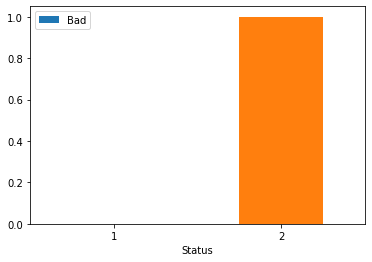

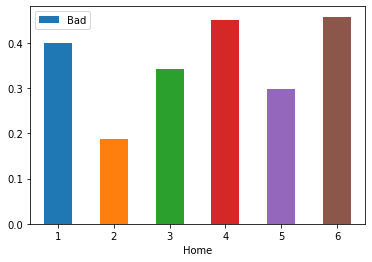

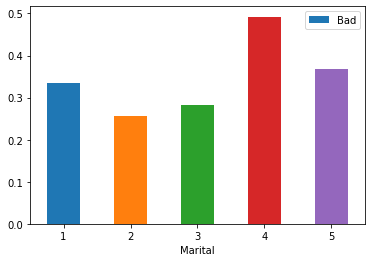

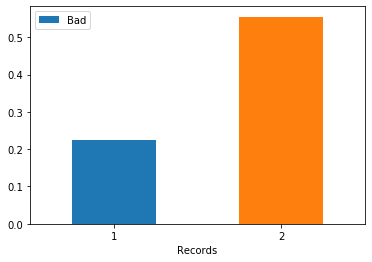

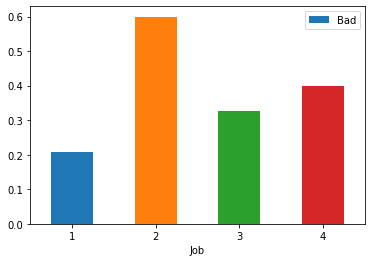

In [16]:
print(categorical_cols)

for col in categorical_cols:
    br=pd.DataFrame(pd.crosstab(dt12[col],dt12.Status,normalize='index')).reset_index()
    br.columns=[col] +['Good','Bad']
    print(br)
    br.plot.bar(y='Bad',x=col, rot=0)
    

### Check Trend of Numeric Columns by Bad rate 

['Seniority', 'Time', 'Age', 'Expenses', 'Income', 'Assets', 'Debt', 'Amount', 'Price']
       Seniority      Good       Bad
0  (-0.048, 9.6]  0.643869  0.356131
1    (9.6, 19.2]  0.838527  0.161473
2   (19.2, 28.8]  0.895604  0.104396
3   (28.8, 38.4]  0.892857  0.107143
4   (38.4, 48.0]  0.916667  0.083333
            Time      Good       Bad
0  (5.934, 19.2]  0.872263  0.127737
1   (19.2, 32.4]  0.814536  0.185464
2   (32.4, 45.6]  0.711637  0.288363
3   (45.6, 58.8]  0.697834  0.302166
4   (58.8, 72.0]  0.689602  0.310398
             Age      Good       Bad
0  (17.95, 28.0]  0.671405  0.328595
1   (28.0, 38.0]  0.705351  0.294649
2   (38.0, 48.0]  0.728185  0.271815
3   (48.0, 58.0]  0.788580  0.211420
4   (58.0, 68.0]  0.833333  0.166667
         Expenses      Good       Bad
0  (34.855, 64.0]  0.730080  0.269920
1    (64.0, 93.0]  0.703327  0.296673
2   (93.0, 122.0]  0.556522  0.443478
3  (122.0, 151.0]  0.642857  0.357143
4  (151.0, 180.0]  0.400000  0.600000
            Income

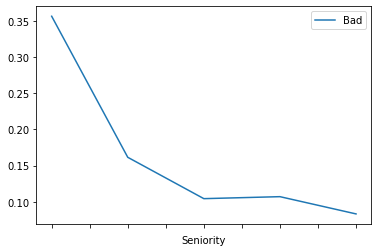

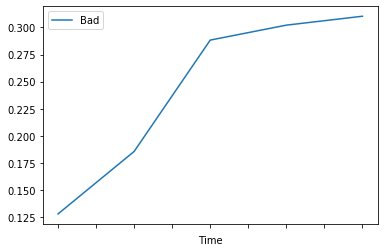

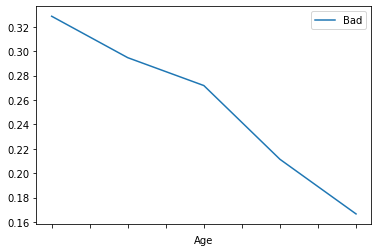

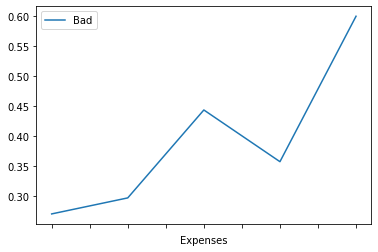

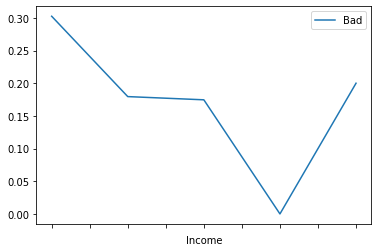

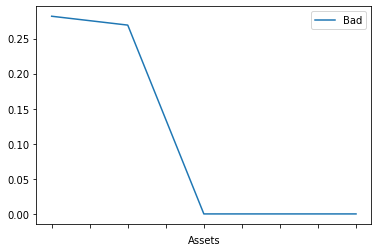

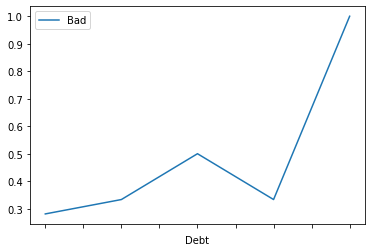

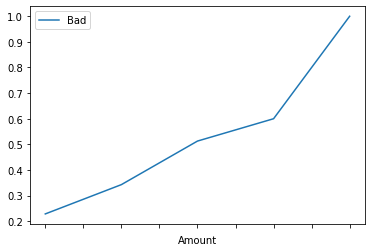

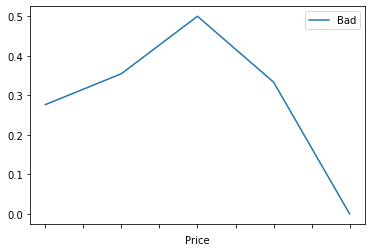

In [17]:
print(numeric_cols)
for col in numeric_cols:
    br=pd.DataFrame(pd.crosstab(pd.cut(dt12[col],5),dt12.Status,normalize='index')).reset_index()
    br.columns=[col] +['Good','Bad']
    print(br)
    br.plot(y='Bad',x=col)

### Train/ Test data preparation

In [30]:
from sklearn.model_selection import train_test_split
import numpy as np
df=dt12
df['Status']=np.where(df.Status==1,0,1)
df.Status.value_counts()

train=df.drop(columns=['Status'])
train=pd.get_dummies(train,drop_first=True)
colnames=train.columns
target=df['Status']
trainx,testx,trainy,testy=train_test_split(train,target,train_size=0.8,random_state=123)

print(train.shape)
print(trainx.shape)
print(trainy.shape)
print(testx.shape)
print(testy.shape)

print('target.mean:',target.mean())
print('trainy.mean:',trainy.mean())
print('testy.mean:',testy.mean())

print('target.count:',target.sum())
print('trainy.count:',trainy.sum())
print('testy.count:',testy.sum())

(4454, 22)
(3563, 22)
(3563,)
(891, 22)
(891,)
target.mean: 0.2815446789402784
trainy.mean: 0.27869772663485826
testy.mean: 0.29292929292929293
target.count: 1254
trainy.count: 993
testy.count: 261


### Variable Selection approach

##### Information Value based selection, IV>=0.02 is good predictor

In [25]:
%run woeiv.py

final_iv, IV = data_vars(dt12,dt12.Status)
IV.sort_values(by='IV',ascending=False)

Apply function like this: final_iv, IV = data_vars(df,df.target); IV.sort_values('IV')


,VAR_NAME,IV
11,Seniority,0.494864
10,Records,0.343136
7,Job,0.329074
6,Income,0.325234
5,Home,0.242477
2,Assets,0.174633
1,Amount,0.118291
8,Marital,0.056194
0,Age,0.033302
12,Time,0.028177


##### RFE or Recursive Feature Elimination based variable selection

In [31]:
from sklearn import datasets
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()

rfe = RFE(logreg)
rfe = rfe.fit(trainx, trainy.values.ravel())
sorted(zip(map(lambda x: round(x, 4), rfe.ranking_), trainx.columns))
# print(rfe.support_)
# print(rfe.ranking_) pd.concat([pd.DataFrame(train.columns[rfe.support_]),pd.DataFrame(rfe.ranking_)],axis=1)

/Users/deepakm/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/deepakm/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/deepakm/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/deepakm/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/deepakm/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed

[(1, 'Home_2'),
 (1, 'Home_4'),
 (1, 'Home_5'),
 (1, 'Home_6'),
 (1, 'Job_2'),
 (1, 'Job_3'),
 (1, 'Job_4'),
 (1, 'Marital_3'),
 (1, 'Marital_4'),
 (1, 'Marital_5'),
 (1, 'Records_2'),
 (2, 'Home_3'),
 (3, 'Seniority'),
 (4, 'Marital_2'),
 (5, 'Expenses'),
 (6, 'Income'),
 (7, 'Age'),
 (8, 'Amount'),
 (9, 'Price'),
 (10, 'Time'),
 (11, 'Debt'),
 (12, 'Assets')]

In [20]:
# print(trainx.head())
# print(trainy.sample())
trainy.value_counts()

0    2570
1     993
Name: Status, dtype: int64

### Classification Model Selection (among Logistic Regression, Tree based models)

In [32]:
from sklearn.ensemble import ExtraTreesClassifier,RandomForestClassifier,GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score,recall_score,accuracy_score, roc_auc_score,precision_recall_curve,f1_score
from sklearn.metrics import classification_report

from xgboost import XGBClassifier

In [33]:
# Fit estimators
ESTIMATORS = {"LR": LogisticRegression(),
              "DT" : DecisionTreeClassifier(),
              "Extra_Trees": ExtraTreesClassifier(n_estimators=500,random_state=123),
              "Random_Forest": RandomForestClassifier(n_estimators=500,random_state=123),
              "GBM": GradientBoostingClassifier(n_estimators=500,random_state=123),
              "XGB": XGBClassifier(n_estimators=500,random_state=123)
}
y_test_proba = dict()
y_test_predict = dict()
for name, estimator in ESTIMATORS.items():
    estimator.fit(trainx, trainy)
    y_test_predict[name] = estimator.predict(testx)
    y_test_proba[name] = estimator.predict_proba(testx)

# Compare Model Metrics
# Model performance
for k,v in y_test_predict.items():
    print(k)
#     print(classification_report(testy, y_test_predict[k]))
    print("precision_score:", precision_score(testy, y_test_predict[k]))
    print("recall_score:", recall_score(testy, y_test_predict[k]))
    print("accuracy_score:", accuracy_score(testy, y_test_predict[k]))
    print("roc_auc_score:", roc_auc_score(testy, y_test_predict[k]))
    print("-----------------------------------")

/Users/deepakm/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LR
precision_score: 0.6994818652849741
recall_score: 0.5172413793103449
accuracy_score: 0.7934904601571269
roc_auc_score: 0.7125889436234264
-----------------------------------
DT
precision_score: 0.5301204819277109
recall_score: 0.5057471264367817
accuracy_score: 0.7239057239057239
roc_auc_score: 0.660016420361248
-----------------------------------
Extra_Trees
precision_score: 0.6505376344086021
recall_score: 0.46360153256704983
accuracy_score: 0.7699214365881033
roc_auc_score: 0.6802134646962232
-----------------------------------
Random_Forest
precision_score: 0.6724137931034483
recall_score: 0.4482758620689655
accuracy_score: 0.7744107744107744
roc_auc_score: 0.6788998357963875
-----------------------------------
GBM
precision_score: 0.6619047619047619
recall_score: 0.5325670498084292
accuracy_score: 0.7833894500561167
roc_auc_score: 0.7099343185550082
-----------------------------------
XGB
precision_score: 0.6778846153846154
recall_score: 0.5402298850574713
accuracy_score: 0.790

In [34]:
# calculate precision-recall curve
precision, recall, thresholds = precision_recall_curve(testy, ESTIMATORS['LR'].predict_proba(testx)[:, 1])
prdt=pd.DataFrame([precision[:-1],recall[:-1],thresholds]).T
prdt.columns=['precision','recall','thresholds']
prdt['thresh']=pd.cut(prdt.thresholds, 10)
# prdt.groupby('thresh').agg({'precision':'max','recall':'max'}).reset_index()
prdt.groupby('thresh').agg({'precision':'mean','recall':'mean'}).reset_index()

,thresh,precision,recall
0,"(0.0257, 0.123]",0.368864,0.987997
1,"(0.123, 0.219]",0.462541,0.908622
2,"(0.219, 0.316]",0.541575,0.799219
3,"(0.316, 0.412]",0.605116,0.681322
4,"(0.412, 0.508]",0.668147,0.568247
5,"(0.508, 0.604]",0.734013,0.448967
6,"(0.604, 0.701]",0.767171,0.317562
7,"(0.701, 0.797]",0.747965,0.184605
8,"(0.797, 0.893]",0.795036,0.100423
9,"(0.893, 0.99]",0.911891,0.040147


In [35]:
important_features = pd.Series(data=ESTIMATORS['XGB'].feature_importances_,index=colnames)
important_features.sort_values(ascending=False,inplace=True)
print(important_features)

Records_2    0.201386
Job_2        0.143415
Seniority    0.077799
Home_2       0.052289
Income       0.052221
Assets       0.048939
Home_5       0.043196
Time         0.038580
Amount       0.038340
Marital_4    0.034383
Expenses     0.032809
Home_6       0.031600
Job_3        0.028536
Price        0.028431
Job_4        0.026970
Debt         0.024687
Age          0.023010
Marital_2    0.017166
Marital_5    0.016887
Marital_3    0.014582
Home_3       0.014248
Home_4       0.010527
dtype: float32


In [36]:
# ESTIMATORS['LR'].coef_
print(ESTIMATORS['LR'].score(trainx,trainy))
print(ESTIMATORS['LR'].score(testx,testy))

0.8066236317709795
0.7934904601571269


In [40]:
print(trainx.head())

      Seniority  Time   Age  Expenses  Income  Assets  Debt  Amount   Price  \
734         2.0  36.0  20.0      35.0   110.0     0.0   0.0   500.0  1314.0   
981         1.0  48.0  39.0      86.0   105.0     0.0   0.0  1300.0  1600.0   
452        10.0  60.0  33.0      56.0   107.0     0.0   0.0   600.0  1250.0   
919         2.0  48.0  25.0      35.0    48.0  6500.0   0.0   900.0   912.0   
1017        0.0  60.0  33.0      54.0    85.0     0.0   0.0  1300.0  1797.0   

      Home_2  ...    Home_5  Home_6  Marital_2  Marital_3  Marital_4  \
734        0  ...         1       0          0          0          0   
981        0  ...         0       0          1          0          0   
452        0  ...         0       0          1          0          0   
919        0  ...         1       0          1          0          0   
1017       0  ...         0       0          1          0          0   

      Marital_5  Records_2  Job_2  Job_3  Job_4  
734           0          0      0      0  

In [41]:
print(ESTIMATORS['XGB'])

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=500, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=123,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)


##### Deatiled output of Logistic Regression 

In [42]:
import statsmodels.api as sm
logit_model=sm.Logit(trainy,trainx)
result=logit_model.fit_regularized()
print(result.summary2())

Optimization terminated successfully.    (Exit mode 0)
            Current function value: 0.43145365979252
            Iterations: 113
            Function evaluations: 148
            Gradient evaluations: 113
                          Results: Logit
Model:              Logit            Pseudo R-squared: 0.271      
Dependent Variable: Status           AIC:              3118.5388  
Date:               2019-11-25 16:45 BIC:              3254.4627  
No. Observations:   3563             Log-Likelihood:   -1537.3    
Df Model:           21               LL-Null:          -2108.3    
Df Residuals:       3541             LLR p-value:      1.4052e-228
Converged:          1.0000           Scale:            1.0000     
No. Iterations:     113.0000                                      
-------------------------------------------------------------------
               Coef.   Std.Err.     z      P>|z|    [0.025   0.975]
-------------------------------------------------------------------
Seniori

/Users/deepakm/anaconda3/lib/python3.6/site-packages/statsmodels/discrete/discrete_model.py:1736: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
/Users/deepakm/anaconda3/lib/python3.6/site-packages/statsmodels/discrete/discrete_model.py:1789: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(self.cdf(q*np.dot(X,params))))


Drop the variables with high p value and repeat the process unless all variables have low p value